# IMPORTING LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# IMPORTING DATASET

In [ ]:
lyric=open('lorde.txt').read()
lyric[:2000]

"Well, summer slipped us underneath her tongue\nOur days and nights are perfumed with obsession\nHalf of my wardrobe is on your bedroom floor\nUse our eyes, throw our hands overboard I am your sweetheart psychopathic crush\nDrink up your movements, still I can't get enough\nI overthink your p-punctuation use\nNot my fault, just a thing that my mind do A rush at the beginning\nI get caught up, just for a minute\nBut lover, you're the one to blame, all that you're doing\nCan you hear the violence?\nMegaphone to my chest Broadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it Our thing progresses, I call and you come through\nBlow all my friendships to sit in hell with you\nBut we're the greatest, they'll hang us in the Louvr

# DATA PRE PROCESSING

In [ ]:
corpus=lyric.lower().split('\n')
for i in range(40,60):
  print(corpus[i])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

watch the wasters blow the speakers
spill my guts beneath the outdoor light
it's just another graceless night
i hate the headlines and the weather
i'm nineteen and i'm on fire
but when we're dancing i'm alright
it's just another graceless night are you lost enough?
have another drink, get lost in us
this is how we get notorious, oh
'cause i don't know
if they keep tellin' me where to go
i'll blow my brains out to the radio, oh all of the things we're taking
'cause we are young and we're ashamed
send us to perfect places
all of our heroes fading
now i can't stand to be alone
let's go to perfect places every night, i live and die
meet somebody, take 'em home
let's kiss and then take off our clothes
it's just another graceless night, 'cause all of the things we're taking


1372

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
for i in range(20):
  print(input_sequences[i])

[112, 196]
[112, 196, 703]
[112, 196, 703, 42]
[112, 196, 703, 42, 568]
[112, 196, 703, 42, 568, 180]
[112, 196, 703, 42, 568, 180, 569]
[22, 165]
[22, 165, 4]
[22, 165, 4, 181]
[22, 165, 4, 181, 36]
[22, 165, 4, 181, 36, 704]
[22, 165, 4, 181, 36, 704, 21]
[22, 165, 4, 181, 36, 704, 21, 705]
[706, 13]
[706, 13, 9]
[706, 13, 9, 707]
[706, 13, 9, 707, 40]
[706, 13, 9, 707, 40, 27]
[706, 13, 9, 707, 40, 27, 19]
[706, 13, 9, 707, 40, 27, 19, 439]


In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(max_sequence_len)
print(input_sequences)

29
[[  0   0   0 ...   0 112 196]
 [  0   0   0 ... 112 196 703]
 [  0   0   0 ... 196 703  42]
 ...
 [  0   0   0 ... 207 140 140]
 [  0   0   0 ... 140 140 140]
 [  0   0   0 ... 140 140 140]]


# BUILDING THE MODEL

In [ ]:
model = Sequential()
model.add(Embedding(1372, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1372/2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1372, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 160)           219520    
                                                                 
 bidirectional (Bidirectiona  (None, 28, 400)          577600    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 400)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               200400    
                                                                 
 dense (Dense)               (None, 686)               69286     
                                                                 
 dense_1 (Dense)             (None, 1372)              942564    
                                                        

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

# TRAINING AND ANALYSING RESULTS


Epoch 1/50
380/380 [==============================] - 78s 205ms/step - loss: 0.6499 - accuracy: 0.8683
Epoch 2/50
380/380 [==============================] - 78s 204ms/step - loss: 0.6645 - accuracy: 0.8621
Epoch 3/50
380/380 [==============================] - 77s 203ms/step - loss: 0.6299 - accuracy: 0.8720
Epoch 4/50
380/380 [==============================] - 77s 203ms/step - loss: 0.6186 - accuracy: 0.8741
Epoch 5/50
380/380 [==============================] - 77s 203ms/step - loss: 0.5951 - accuracy: 0.8764
Epoch 6/50
380/380 [==============================] - 77s 202ms/step - loss: 0.5835 - accuracy: 0.8785
Epoch 7/50
380/380 [==============================] - 77s 203ms/step - loss: 0.5827 - accuracy: 0.8770
Epoch 8/50
380/380 [==============================] - 77s 203ms/step - loss: 0.5721 - accuracy: 0.8805
Epoch 9/50
380/380 [==============================] - 77s 203ms/step - loss: 0.5791 - accuracy: 0.8782
Epoch 10/50
380/380 [==============================] - 77s 203ms/step - l

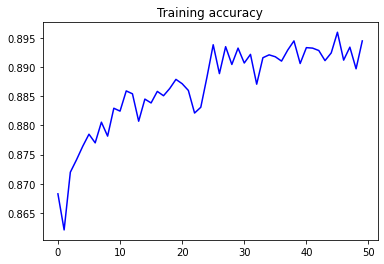

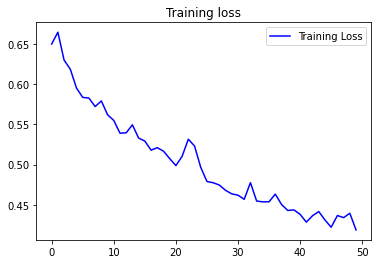

In [ ]:
history = model.fit(predictors, label, epochs=50, verbose=1)
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# TESTING THE MODEL

In [ ]:
next_words = 20
seed_text = "diamond in the flesh"
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  classes_x=np.argmax(predicted,axis=1)

  output_word = ""
  for word, index in tokenizer.word_index.items():
    if (index == classes_x):
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

diamond in the flesh sings the stars there's so much down here we aren't caught up in your love affair and we'll never be
